<h3 style="color: green"><b>Association Rules (Unsupervised ML)</h3>

<h2 style="color: red"><b>Exercise A:</b></h2>

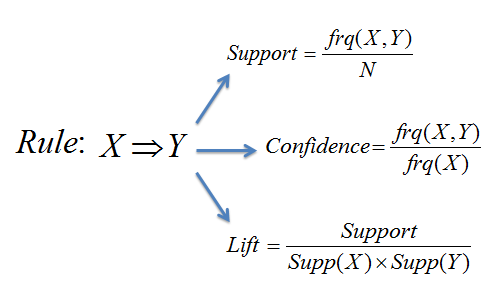

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [292]:
data_set = pd.read_csv("c_log_serwer_www_2018.csv", sep=";")
X = data_set.iloc[:, 0].values
y = data_set.iloc[:, 1].values

print(f"Readed data set: \n{data_set}")
print(f"X Independent variable: \n{X}")
print(f"y dependent variable: \n{y}")

Readed data set: 
             OS Webbrowser
0    Windows NT     Chrome
1         Linux      KHTML
2    Compatible    Firefox
3    Windows NT      Gecko
4    Windows NT       MSIE
..          ...        ...
127  Windows NT      KHTML
128       Linux    Firefox
129  Compatible      Gecko
130  Windows NT       MSIE
131  Windows NT     Safari

[132 rows x 2 columns]
X Independent variable: 
['Windows NT' 'Linux' 'Compatible' 'Windows NT' 'Windows NT' 'Windows NT'
 'Windows NT' 'Windows NT' 'Windows NT' 'Compatible' 'Windows NT'
 'Windows NT' 'Windows NT' 'Linux' 'Compatible' 'Windows NT' 'Windows NT'
 'MacOS' 'Android' 'Windows NT' 'Windows NT' 'Windows NT' 'Windows NT'
 'Windows NT' 'Windows NT' 'Linux' 'Compatible' 'Windows NT' 'Windows NT'
 'MacOS' 'Android' 'Windows NT' 'Linux' 'Compatible' 'Windows NT'
 'Windows NT' 'Windows NT' 'Linux' 'Compatible' 'Windows NT' 'Windows NT'
 'MacOS' 'Android' 'Windows NT' 'Linux' 'Compatible' 'Windows NT'
 'Windows NT' 'Windows NT' 'Linux' 'Compatib

In [293]:
number_of_instances = X.shape[0]
print(f"Number of instances: {number_of_instances}")

records = []
for i in range(0, number_of_instances):
    records.append([X[i], y[i]])
    
print(f"Records: \n{records}")

Number of instances: 132
Records: 
[['Windows NT', 'Chrome'], ['Linux', 'KHTML'], ['Compatible', 'Firefox'], ['Windows NT', 'Gecko'], ['Windows NT', 'MSIE'], ['Windows NT', 'Safari'], ['Windows NT', 'Chrome'], ['Windows NT', 'KHTML'], ['Windows NT', 'Firefox'], ['Compatible', 'Gecko'], ['Windows NT', 'MSIE'], ['Windows NT', 'Safari'], ['Windows NT', 'Chrome'], ['Linux', 'KHTML'], ['Compatible', 'Firefox'], ['Windows NT', 'Gecko'], ['Windows NT', 'MSIE'], ['MacOS', 'Safari'], ['Android', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Linux', 'KHTML'], ['Compatible', 'Firefox'], ['Windows NT', 'Gecko'], ['Windows NT', 'MSIE'], ['MacOS', 'Safari'], ['Android', 'Chrome'], ['Windows NT', 'KHTML'], ['Linux', 'Firefox'], ['Compatible', 'Gecko'], ['Windows NT', 'MSIE'], ['Windows NT', 'Safari'], ['Windows NT', 'Chrome'], ['Linux', 'KHTML'], ['Compatible', 'Firefox'], ['Wind

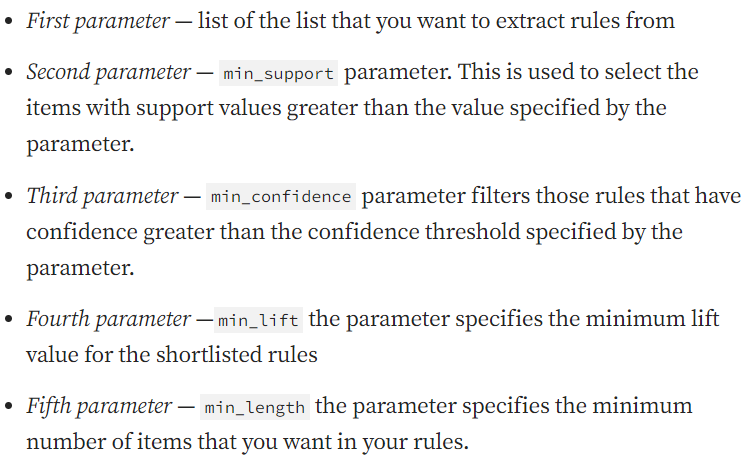

In [294]:
min_supports = [0.001, 0.002, 0.003, 0.004, 0.005]
min_confidence = [0.1, 0.2, 0.3, 0.4, 0.5]

for min_support, min_confidence in zip(min_supports, min_confidence):
    print(f"\n---------------------------------------------------------")
    print(f"Minimum support: {min_support}, Minimum confidence: {min_confidence}\n")
    rules = apriori(
            records, min_support = min_support, min_confidence = min_confidence,
            min_lift = 2, min_length=2
    )
    results = pd.DataFrame(list(rules))
    print(f"1. Raw results: {results}\n")
    print(f"2. Formatted results: \n{results[['items', 'support']]}")
    print(f"\n3. Ordered statistics: \n{results['ordered_statistics']}")
    print(f"---------------------------------------------------------\n")


---------------------------------------------------------
Minimum support: 0.001, Minimum confidence: 0.1

1. Raw results:                    items   support  \
0      (Android, Chrome)  0.075758   
1  (Compatible, Firefox)  0.075758   
2    (Compatible, Gecko)  0.060606   
3       (Linux, Firefox)  0.053030   
4         (KHTML, Linux)  0.075758   
5        (Safari, MacOS)  0.068182   

                                  ordered_statistics  
0  [((Android), (Chrome), 1.0, 3.0), ((Chrome), (...  
1  [((Compatible), (Firefox), 0.4761904761904762,...  
2  [((Compatible), (Gecko), 0.380952380952381, 2....  
3  [((Firefox), (Linux), 0.38888888888888895, 2.5...  
4  [((KHTML), (Linux), 0.5555555555555556, 3.6666...  
5  [((MacOS), (Safari), 0.8999999999999999, 6.6),...  

2. Formatted results: 
                   items   support
0      (Android, Chrome)  0.075758
1  (Compatible, Firefox)  0.075758
2    (Compatible, Gecko)  0.060606
3       (Linux, Firefox)  0.053030
4         (KHTML, Linux) 

<h3><b>Approach based on <span style="color:red">MlxTend</span> library:</b></h3>

In [295]:
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [296]:
transaction_encoder = TransactionEncoder()
transaction_encoder.fit(records)
data = transaction_encoder.transform(records)
data = pd.DataFrame(data, columns=transaction_encoder.columns_)

support_values = ap(data, min_support=0.1, 
                    use_colnames=True, verbose=1)

rules = association_rules(support_values, metric="confidence", min_threshold=0.2)

Processing 72 combinations | Sampling itemset size 2


In [297]:
print(f"Raw records: {records}")
print(f"Number of records: {len(records)}")
print(f"Formatted data: \n{data}")

Raw records: [['Windows NT', 'Chrome'], ['Linux', 'KHTML'], ['Compatible', 'Firefox'], ['Windows NT', 'Gecko'], ['Windows NT', 'MSIE'], ['Windows NT', 'Safari'], ['Windows NT', 'Chrome'], ['Windows NT', 'KHTML'], ['Windows NT', 'Firefox'], ['Compatible', 'Gecko'], ['Windows NT', 'MSIE'], ['Windows NT', 'Safari'], ['Windows NT', 'Chrome'], ['Linux', 'KHTML'], ['Compatible', 'Firefox'], ['Windows NT', 'Gecko'], ['Windows NT', 'MSIE'], ['MacOS', 'Safari'], ['Android', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Windows NT', 'Chrome'], ['Linux', 'KHTML'], ['Compatible', 'Firefox'], ['Windows NT', 'Gecko'], ['Windows NT', 'MSIE'], ['MacOS', 'Safari'], ['Android', 'Chrome'], ['Windows NT', 'KHTML'], ['Linux', 'Firefox'], ['Compatible', 'Gecko'], ['Windows NT', 'MSIE'], ['Windows NT', 'Safari'], ['Windows NT', 'Chrome'], ['Linux', 'KHTML'], ['Compatible', 'Firefox'], ['Windows NT', 'Gecko'], ['W

In [298]:
print(f"Support values: \n{support_values}")
rules =  rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

Support values: 
     support              itemsets
0   0.333333              (Chrome)
1   0.159091          (Compatible)
2   0.136364             (Firefox)
3   0.128788               (Gecko)
4   0.136364               (KHTML)
5   0.151515               (Linux)
6   0.128788                (MSIE)
7   0.136364              (Safari)
8   0.537879          (Windows NT)
9   0.204545  (Chrome, Windows NT)
10  0.128788    (MSIE, Windows NT)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(MSIE),(Windows NT),0.128788,0.537879,0.128788,1.000000,1.859155,0.059516,inf,0.530435
0,(Chrome),(Windows NT),0.333333,0.537879,0.204545,0.613636,1.140845,0.025253,1.196078,0.185185
1,(Windows NT),(Chrome),0.537879,0.333333,0.204545,0.380282,1.140845,0.025253,1.075758,0.267152
3,(Windows NT),(MSIE),0.537879,0.128788,0.128788,0.239437,1.859155,0.059516,1.145483,1.000000


<h2 style="color: red"><b>Exercise B:</b></h2>

In [299]:
file = open("seq_data_formatted.csv")

header = file.readline()

header_map =header.split(" ")
number_of_instances = len(file.readlines())
number_of_attributes = len(header_map)
reduced_number_of_instances = 1000

file.close()

print(f"Number of instances: {number_of_instances}")
print(f"Number of attributes: {number_of_attributes}")
print(header_map)

file = open("seq_data_formatted.csv")
file.readline()

records = []
for line, i in zip(file, range(reduced_number_of_instances)):
    if i == reduced_number_of_instances:
        break
    record = [x for x in line.rstrip("\n").split(' ')]
    record = list(set([int(x) for x in record[:-1]]))
    record = [header_map[x-1] for x in record]
    records.append(record)

print(records)


Number of instances: 989818
Number of attributes: 17
['frontpage', 'news', 'tech', 'local', 'opinion', 'on-air', 'misc', 'weather', 'msn-news', 'health', 'living', 'business', 'msn-sports', 'sports', 'summary', 'bbs', 'travel\n']
[['frontpage'], ['news'], ['news', 'tech', 'local'], ['opinion'], ['frontpage'], ['on-air'], ['frontpage'], ['on-air'], ['weather', 'on-air', 'misc'], ['tech', 'local', 'opinion', 'on-air', 'msn-news', 'health'], ['frontpage', 'living'], ['business'], ['frontpage'], ['weather'], ['on-air'], ['news'], ['msn-news', 'business'], ['tech'], ['msn-news'], ['tech'], ['business'], ['opinion'], ['msn-sports'], ['msn-news', 'on-air'], ['news', 'on-air'], ['business'], ['frontpage'], ['tech'], ['on-air', 'misc'], ['on-air'], ['sports'], ['news', 'tech', 'local'], ['on-air'], ['on-air'], ['on-air'], ['weather', 'frontpage', 'misc'], ['on-air'], ['frontpage'], ['local', 'msn-sports', 'sports', 'misc'], ['weather'], ['frontpage'], ['weather'], ['msn-sports'], ['msn-sports']

In [300]:
min_support = 0.005
min_confidence = 0.5

print(f"Minimum support: {min_support}, Minimum confidence: {min_confidence}\n")
rules = apriori(
        records, 
        min_support = min_support, 
        min_confidence = min_confidence,
        min_lift = 2, min_length=2
)
results = pd.DataFrame(list(rules))
print(f"Raw results: \n{results}")
print(f"Formatted results: \n{results[['items', 'support']]}")
print(f"Ordered statistics: \n{results['ordered_statistics']}")

Minimum support: 0.005, Minimum confidence: 0.5

Raw results: 
                                                 items  support  \
0                                   (living, travel\n)    0.007   
1                                       (on-air, misc)    0.047   
2                                     (travel\n, news)    0.008   
3                        (health, frontpage, business)    0.011   
4                        (living, frontpage, business)    0.012   
..                                                 ...      ...   
319  (opinion, local, on-air, living, frontpage, news)    0.005   
320   (opinion, on-air, misc, living, frontpage, news)    0.005   
321      (health, opinion, on-air, misc, living, news)    0.005   
322  (health, business, on-air, misc, living, front...    0.005   
323  (health, opinion, on-air, misc, living, frontp...    0.005   

                                    ordered_statistics  
0     [((travel\n), (living), 0.5, 7.042253521126761)]  
1    [((misc), (on

<h3><b>Approach based on <span style="color:red">MlxTend</span> library:</b></h3>

In [301]:
transaction_encoder = TransactionEncoder()
transaction_encoder.fit(records)
data = transaction_encoder.transform(records)
data = pd.DataFrame(data, columns=transaction_encoder.columns_)

support_values = ap(data, min_support=0.05, 
                    use_colnames=True, verbose=1)

rules = association_rules(support_values, metric="confidence", min_threshold=0.01)

Processing 3 combinations | Sampling itemset size 3 2


In [302]:
print(f"Support values: \n{support_values}")

rules =  rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

Support values: 
    support             itemsets
0     0.104           (business)
1     0.298          (frontpage)
2     0.068             (health)
3     0.071             (living)
4     0.113              (local)
5     0.089               (misc)
6     0.094           (msn-news)
7     0.081         (msn-sports)
8     0.171               (news)
9     0.228             (on-air)
10    0.134             (sports)
11    0.128               (tech)
12    0.113            (weather)
13    0.067    (frontpage, news)
14    0.050  (sports, frontpage)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(news),(frontpage),0.171,0.298,0.067,0.391813,1.314808,0.016042,1.154250,0.288821
2,(sports),(frontpage),0.134,0.298,0.050,0.373134,1.252129,0.010068,1.119857,0.232517
0,(frontpage),(news),0.298,0.171,0.067,0.224832,1.314808,0.016042,1.069446,0.341072
3,(frontpage),(sports),0.298,0.134,0.050,0.167785,1.252129,0.010068,1.040597,0.286838
